predict whether a customer will churn or not?

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

ID :Unique Identifier of a row


Age:Age of the customer


Gender:Gender of the customer (Male and Female)


Income:Yearly income of the customer


Balance:Average quarterly balance of the customer


Vintage:No. of years the customer is associated with bank


Transaction_Status:Whether the customer has done any transaction in the past 3 months or not


Product_Holdings:No. of product holdings with the bank


Credit_Card:Whether the customer has a credit card or not


Credit_Category:Category of a customer based on the credit score


Is_Churn:Whether the customer will churn in next 6 months or not

# Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
train = pd.read_csv("train_PDjVQMB.csv")
test = pd.read_csv("test_lTY72QC.csv")

In [3]:
train.shape,test.shape

((6650, 11), (2851, 10))

In [4]:
train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [5]:
test.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
dtype: object

# Data Cleaning

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [6]:
train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [7]:
test.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

# EDA

<AxesSubplot:xlabel='Gender', ylabel='Is_Churn'>

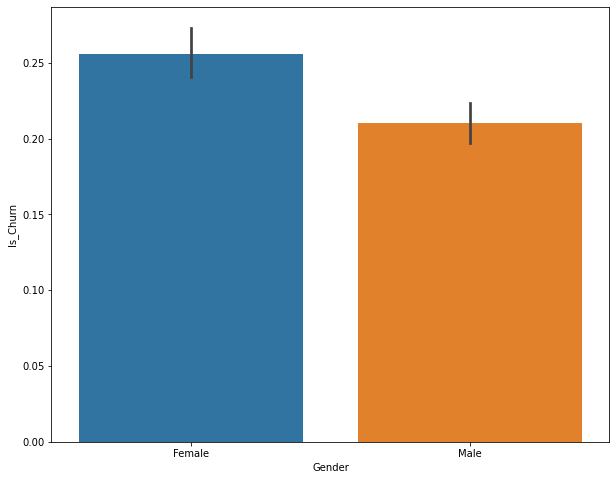

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Is_Churn',data=train)

0:Female
    
1:Male

<AxesSubplot:xlabel='Income', ylabel='Is_Churn'>

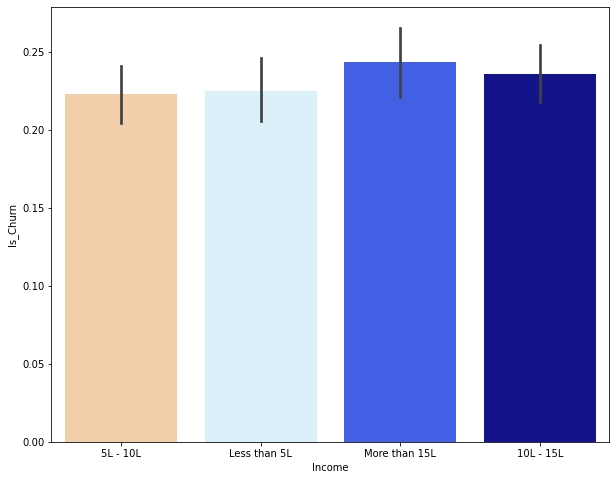

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x='Income',y='Is_Churn',data=train,palette='flag')

<AxesSubplot:xlabel='Vintage', ylabel='Is_Churn'>

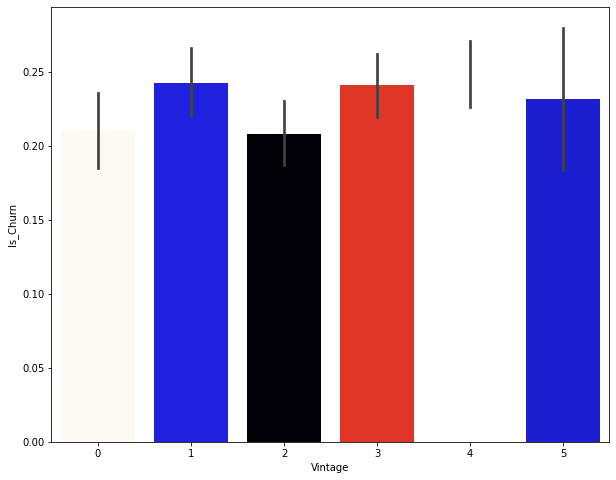

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x='Vintage',y='Is_Churn',data=train,palette='flag')

<AxesSubplot:xlabel='Transaction_Status', ylabel='count'>

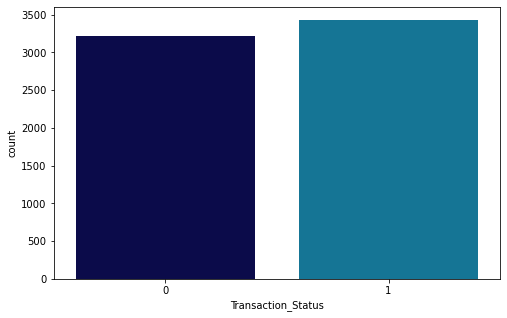

In [11]:
plt.figure(figsize=(8,5))
sns.countplot('Transaction_Status',data=train,palette='ocean')

<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

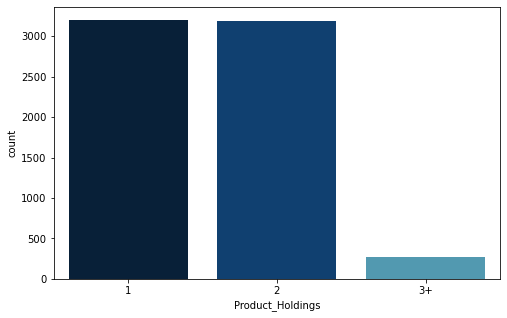

In [12]:
plt.figure(figsize=(8,5))
sns.countplot('Product_Holdings',data=train,palette='ocean')

<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

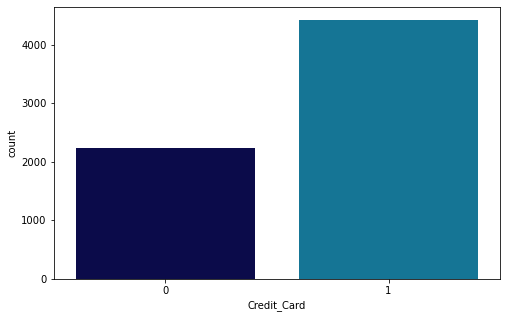

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Card',data=train,palette='ocean')

# Label Encoding

In [14]:

le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [15]:
train.dtypes

ID                      int32
Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int32
Credit_Card             int64
Credit_Category         int32
Is_Churn                int64
dtype: object

In [16]:
test.dtypes

ID                      int32
Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int32
Credit_Card             int64
Credit_Category         int32
dtype: object

In [17]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,3444,36,0,1,563266.44,4,0,0,0,0,1
1,2246,53,0,2,875572.11,2,1,0,1,2,0
2,3691,35,0,3,701607.06,2,1,1,0,2,0
3,5094,43,0,3,1393922.16,0,1,1,1,2,1
4,3884,39,0,3,893146.23,1,1,0,1,1,1


# Building Model

In [18]:
X=train.iloc[:,0:10].values

In [19]:
train.iloc[:,0:10]

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,3444,36,0,1,563266.44,4,0,0,0,0
1,2246,53,0,2,875572.11,2,1,0,1,2
2,3691,35,0,3,701607.06,2,1,1,0,2
3,5094,43,0,3,1393922.16,0,1,1,1,2
4,3884,39,0,3,893146.23,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
6645,4373,61,1,1,1354526.19,4,1,1,1,2
6646,543,42,0,1,596286.54,3,1,1,1,0
6647,5481,29,1,2,979298.19,2,0,1,0,2
6648,2255,66,0,0,395233.65,3,0,1,1,2


In [20]:
y=train.iloc[:,-1].values

In [21]:
train.iloc[:,-1]

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [23]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))

F1 Score: 0.249


In [25]:
submission = pd.read_csv('sample_OoSmYo5.csv')
final_predictions = clf.predict(test)
submission['Is_Churn'] = final_predictions
#only positive predictions for the target variable
submission['Is_Churn'] = submission['Is_Churn'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('submission3.csv', index=False)